PREDICTING HOUSE PRICES

In [1]:
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

In [2]:
data = pd.read_csv("C:/Users/Asus/Desktop/nyc-rolling-sales.csv")

In [3]:
data.shape

(84548, 22)

In [4]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

DATA ASSESSMENT

In [6]:
!pip install pandas_profiling

In [7]:
import pandas_profiling as pp

In [9]:
report = pp.ProfileReport(data)

In [10]:
report

In [11]:
report.to_file('data_assessement.html')

VARIABLE SELECTION AND DATA CLEANING

Y = SALES_PRICE
x = 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'ZIP CODE', 'TOTAL UNITS', 'YEAR BUILT', 'BOROUGH'

In [12]:
#Convert variable to numeric
data['LAND_SQUARE_FEET'] = pd.to_numeric(data['LAND_SQUARE_FEET'], errors='coerce')
data['LAND_SQUARE_FEET'] = data['LAND_SQUARE_FEET'].fillna(0)
data['LAND_SQUARE_FEET'].isna().sum()

0

In [13]:
#Convert variable to numeric
data['GROSS_SQUARE_FEET'] = pd.to_numeric(data['GROSS_SQUARE_FEET'], errors='coerce')
data['GROSS_SQUARE_FEET'] = data['GROSS_SQUARE_FEET'].fillna(0)
data['GROSS_SQUARE_FEET'].isna().sum()

0

In [14]:
#Convert variable to numeric
data['ZIP_CODE'] = pd.to_numeric(data['ZIP_CODE'], errors = 'coerce')
data['ZIP_CODE'] = data['ZIP_CODE'].fillna(0)
data['ZIP_CODE'].isna().sum()

0

In [15]:
#Convert variable to numeric
data['TOTAL_UNITS'] = pd.to_numeric(data['TOTAL_UNITS'], errors='coerce')
data['TOTAL_UNITS'] = data['TOTAL_UNITS'].fillna(0)
data['TOTAL_UNITS'].isna().sum()

0

In [30]:
#Convert variable to numeric
data['YEAR_BUILT'] = pd.to_numeric(data['YEAR_BUILT'], errors = 'coerce')
data['YEAR_BUILT'] = data['YEAR_BUILT'].fillna(0)
data['YEAR_BUILT'].isna().sum()

0

In [31]:
#Restrict data to non-zero features
data = data[data['LAND_SQUARE_FEET'] > 0]
data = data[data['GROSS_SQUARE_FEET'] > 0]
data = data[data['ZIP_CODE'] > 0]
data = data[data['TOTAL_UNITS'] > 0]
data = data[data['YEAR_BUILT'] > 0]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45389 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed_0                         45389 non-null int64
BOROUGH                           45389 non-null int64
NEIGHBORHOOD                      45389 non-null object
BUILDING_CLASS_CATEGORY           45389 non-null object
TAX_CLASS_AT_PRESENT              45389 non-null object
BLOCK                             45389 non-null int64
LOT                               45389 non-null int64
EASE-MENT                         45389 non-null object
BUILDING_CLASS_AT_PRESENT         45389 non-null object
ADDRESS                           45389 non-null object
APARTMENT_NUMBER                  45389 non-null object
ZIP_CODE                          45389 non-null int64
RESIDENTIAL_UNITS                 45389 non-null int64
COMMERCIAL_UNITS                  45389 non-null int64
TOTAL_UNITS                       45389 non-null int64
LAND_SQUARE_FEET                  45389 non-null float64
GR

In [34]:
#Create dummies for borough
borough = pd.get_dummies(data['BOROUGH'])
borough

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
84543,0,0,0,0,1
84544,0,0,0,0,1
84545,0,0,0,0,1
84546,0,0,0,0,1


In [38]:
#Merge borough dummies to dataframe
new_data = pd.concat([data, borough], axis = 1, sort = False)
new_data.head()

,Unnamed_0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,...,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,1,2,3,4,5
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,1900,2,C2,6625000,2017-07-19 00:00:00,1,0,0,0,0
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,1900,2,C7,-,2016-12-14 00:00:00,1,0,0,0,0
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,1900,2,C7,-,2016-12-09 00:00:00,1,0,0,0,0
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,1913,2,C4,3936272,2016-09-23 00:00:00,1,0,0,0,0
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,1900,2,C2,8000000,2016-11-17 00:00:00,1,0,0,0,0


CLEANING AND TRIMMING SALES PRICES DATA

In [41]:
#Convert variable to numeric
new_data['SALE_PRICE'] = pd.to_numeric(new_data['SALE_PRICE'], errors='coerce')
new_data['SALE_PRICE'] = new_data['SALE_PRICE'].fillna(0)
new_data['SALE_PRICE'].isna().sum()

0

In [42]:
new_data['SALE_PRICE'].describe()

count    4.538900e+04
mean     1.055733e+06
std      1.368310e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+05
75%      7.350000e+05
max      2.210000e+09
Name: SALE_PRICE, dtype: float64

In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45389 entries, 0 to 84547
Data columns (total 27 columns):
Unnamed_0                         45389 non-null int64
BOROUGH                           45389 non-null int64
NEIGHBORHOOD                      45389 non-null object
BUILDING_CLASS_CATEGORY           45389 non-null object
TAX_CLASS_AT_PRESENT              45389 non-null object
BLOCK                             45389 non-null int64
LOT                               45389 non-null int64
EASE-MENT                         45389 non-null object
BUILDING_CLASS_AT_PRESENT         45389 non-null object
ADDRESS                           45389 non-null object
APARTMENT_NUMBER                  45389 non-null object
ZIP_CODE                          45389 non-null int64
RESIDENTIAL_UNITS                 45389 non-null int64
COMMERCIAL_UNITS                  45389 non-null int64
TOTAL_UNITS                       45389 non-null int64
LAND_SQUARE_FEET                  45389 non-null float64
GR

In [44]:
#Remove observations with sales price of zero.
new_data = new_data[new_data['SALE_PRICE'] > 0]

In [101]:
#Compute 5th and 95th percentile
sales90 = np.percentile(new_data['SALE_PRICE'].fillna(0),95) 
sales05 = np.percentile(new_data['SALE_PRICE'].fillna(0),5) 

In [102]:
#Trim to exlude observations under the 5th and 95th percentile
finaldata = new_data[new_data['SALE_PRICE']>sales05]
finaldata = new_data[new_data['SALE_PRICE']<sales95]

In [103]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27805 entries, 6 to 84547
Data columns (total 27 columns):
Unnamed_0                         27805 non-null int64
BOROUGH                           27805 non-null int64
NEIGHBORHOOD                      27805 non-null object
BUILDING_CLASS_CATEGORY           27805 non-null object
TAX_CLASS_AT_PRESENT              27805 non-null object
BLOCK                             27805 non-null int64
LOT                               27805 non-null int64
EASE-MENT                         27805 non-null object
BUILDING_CLASS_AT_PRESENT         27805 non-null object
ADDRESS                           27805 non-null object
APARTMENT_NUMBER                  27805 non-null object
ZIP_CODE                          27805 non-null int64
RESIDENTIAL_UNITS                 27805 non-null int64
COMMERCIAL_UNITS                  27805 non-null int64
TOTAL_UNITS                       27805 non-null int64
LAND_SQUARE_FEET                  27805 non-null float64
GR

In [104]:
finaldata['SALE_PRICE'].describe()

count    2.780500e+04
mean     7.229285e+05
std      5.326316e+05
min      1.000000e+00
25%      4.100000e+05
50%      5.950000e+05
75%      8.800000e+05
max      3.499000e+06
Name: SALE_PRICE, dtype: float64

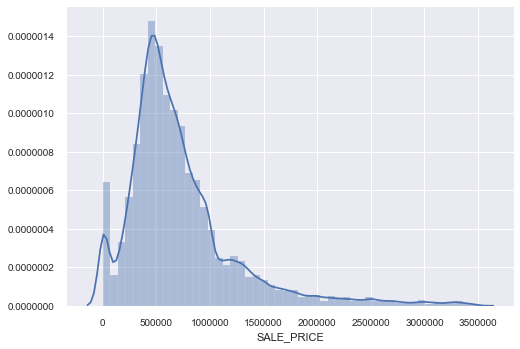

In [105]:
sns.distplot(finaldata['SALE_PRICE'])

LINEAR REGRESSION

In [106]:
features = ['LAND_SQUARE_FEET','GROSS_SQUARE_FEET','ZIP_CODE', 'YEAR_BUILT', 'TOTAL_UNITS', 1, 2, 3, 4, 5]
X = finaldata[features]
y = finaldata['SALE_PRICE']

In [107]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [108]:
# Initialize model
model = LinearRegression() 

In [109]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [111]:
# calculate the R-squared
model.score(X_test, y_test)

0.13464007065969097

In [112]:
y_predicted = model.predict(X_test)

In [89]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

490728.4025273265

In [113]:
from sklearn.metrics import mean_absolute_error  #Mean absolute error
mean_absolute_error(y_test, y_predicted)

331653.9800525092

ADVANCED LINEAR REGRESSION TECHNIQUES

Ridge Regression

In [114]:
from sklearn.linear_model import Ridge

In [115]:
rid = Ridge(alpha=1.0)
rid = rid.fit(X_train, y_train)
y_predicted = rid.predict(X_test)
np.sqrt(mse(y_predicted, y_test))

490738.13235575816

Lasso Regression

In [118]:
from sklearn import linear_model

In [119]:
lasso = linear_model.Lasso(alpha=0.1)
lasso = lasso.fit(X_train, y_train)
y_predicted = lasso.predict(X_test)
np.sqrt(mse(y_predicted, y_test))

490728.44951340614

ElasticNet

In [120]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [121]:
regr  = ElasticNet(max_iter=1000,random_state=0,)
regr = regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)
np.sqrt(mse(y_predicted, y_test))

511405.6916804363

Artificial Neural Network

In [122]:
from sklearn.neural_network import MLPRegressor

In [123]:
MLPReg = MLPRegressor(random_state=0)
MLPReg = MLPReg.fit(X_train, y_train)
y_predicted = MLPReg.predict(X_test)
np.sqrt(mse(y_predicted, y_test))

480234.9665108558

Decision Trees

In [124]:
from sklearn import tree

In [125]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
np.sqrt(mse(y_predicted, y_test))

520813.45912845683